In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

Import training data from file:

In [31]:
with open('trainingset.csv', 'r') as csvfile:
    df = pd.read_csv(csvfile, dtype={'booking_bool':bool,'srch_destination_id':np.int32, 
                                     'site_id':np.int32, 'visitor_location_country_id':np.int32,
                                     'visitor_hist_starrating':np.float, 'visitor_hist_adr_usd':np.float,
                                     'prop_country_id':np.int32, 'prop_id':np.int32, 
                                     'prop_starrating':np.int32, 'prop_review_score':np.float,
                                     'prop_brand_bool':bool, 'prop_location_score1':np.float,
                                     'prop_location_score2':np.float, 'prop_log_historical_price':np.float,
                                     'price_usd':np.float, 'promotion_flag':bool,\
                                     'srch_length_of_stay':np.int32, 'srch_booking_window':np.int32,
                                     'srch_adults_count':np.int32, 'srch_children_count':np.int32,
                                     'srch_room_count':np.int32, 'srch_saturday_night_bool':bool,
                                     'srch_query_affinity_score':np.float, 'orig_destination_distance':np.float,
                                     'random_bool':bool, 'position':np.int32, 'click_bool':bool,
                                     'booking_bool':bool, 'gross_booking_usd':np.float})


# EDA

Number of unique stuff:

In [35]:
print("Number of unique searches:"),len(df.srch_id.unique())
print("Number of countries:"),len(df.prop_country_id.unique())
print("Number of hotels:"),len(df.prop_id.unique())

Number of unique searches: 199795
Number of countries: 172
Number of hotels: 129113


Difference in price between client history and current price for booked/clicked/none

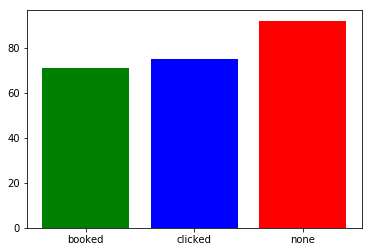

In [49]:
df['usd_diff'] = abs(df.price_usd - df.visitor_hist_adr_usd)

diffUsd_click = np.array(df.usd_diff.loc[df['click_bool']==True])
diffUsd_click = diffUsd_click[~np.isnan(diffUsd_click)]
mean_click = np.mean(diffUsd_click)

diffUsd_book = np.array(df.usd_diff.loc[df['booking_bool']==True])
diffUsd_book = diffUsd_book[~np.isnan(diffUsd_book)]
mean_book = np.mean(diffUsd_book)

diffUsd_none = np.array(df.usd_diff.loc[(df['click_bool']==False) & df['booking_bool']==False])
diffUsd_none = diffUsd_none[~np.isnan(diffUsd_none)]
mean_none = np.mean(diffUsd_none)

np_means = np.array([mean_book,mean_click,mean_none])
keys = ['booked','clicked','none']

plt.bar(range(len(np_means)), np_means, align='center',color = ['green','blue','red'])
plt.xticks(range(len(np_means)), keys)

plt.show()
        

Difference in rating between client history and prop rating for booked/clicked/none

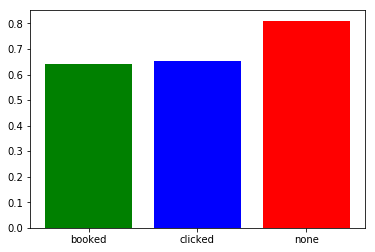

In [50]:
df['star_diff'] = abs(df.prop_starrating - df.visitor_hist_starrating) 

diffStar_click = np.array(df.star_diff.loc[df['click_bool']==True])
diffStar_click = diffStar_click[~np.isnan(diffStar_click)]
mean_click = np.mean(diffStar_click)

diffStar_book = np.array(df.star_diff.loc[df['booking_bool']==True])
diffStar_book = diffStar_book[~np.isnan(diffStar_book)]
mean_book = np.mean(diffStar_book)

diffStar_none = np.array(df.star_diff.loc[(df['click_bool']==False) & df['booking_bool']==False])
diffStar_none = diffStar_none[~np.isnan(diffStar_none)]
mean_none = np.mean(diffStar_none)

np_means = np.array([mean_book,mean_click,mean_none])
keys = ['booked','clicked','none']

plt.bar(range(len(np_means)), np_means, align='center',color = ['green','blue','red'])
plt.xticks(range(len(np_means)), keys)

plt.show()
        

See if promotion flag influences click/book:

In [38]:
totalClick = len(df.loc[df['click_bool']==True])
promClick = len(df.loc[(df['click_bool']==True) & (df['promotion_flag'] == True)])
print ("Total nr clicks/Promotion flag clicks"), totalClick, promClick

totalBook = len(df.loc[df['booking_bool']==True])
promBook = len(df.loc[(df['booking_bool']==True) & (df['promotion_flag'] == True)])
print ("Total nr bookings/Promotion flag bookings"), totalBook, promBook

totalProm = len(df.loc[df['promotion_flag']==True])
print ("Number of promotion flags:"), totalProm

Total nr clicks/Promotion flag clicks 221879 64469
Total nr bookings/Promotion flag bookings 138390 41947
Number of promotion flags: 1069118


Overview of competitors

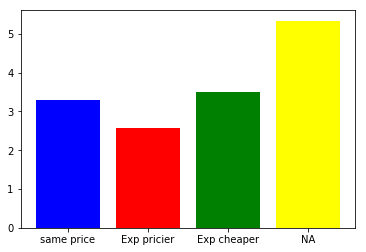

In [39]:
click_equal_1 = len(df.comp1_rate.loc[(df.comp1_rate == 0) & (df.click_bool == True)])
click_more_1 = len(df.comp1_rate.loc[(df.comp1_rate == -1) & (df.click_bool == True)])
click_less_1 = len(df.comp1_rate.loc[(df.comp1_rate == 1) & (df.click_bool == True)])
click_na_1 = len(df.comp1_rate.loc[(np.isnan(df.comp1_rate)) & (df.click_bool == True)])

npRes = np.log10(np.array([click_equal_1, click_more_1, click_less_1, click_na_1]))
keys = ['same price', 'Exp pricier', 'Exp cheaper', 'NA']

plt.bar(range(len(npRes)), npRes, align='center',color = ['blue','red','green', 'yellow'])
plt.xticks(range(len(npRes)), keys)
plt.show()



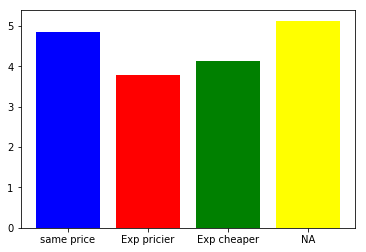

In [37]:
click_equal_2 = len(df.comp2_rate.loc[(df.comp2_rate == 0) & (df.click_bool == True)])
click_more_2 = len(df.comp2_rate.loc[(df.comp2_rate == -1) & (df.click_bool == True)])
click_less_2 = len(df.comp2_rate.loc[(df.comp2_rate == 1) & (df.click_bool == True)])
click_na_2 = len(df.comp2_rate.loc[(np.isnan(df.comp2_rate)) & (df.click_bool == True)])

npRes = np.log10(np.array([click_equal_2, click_more_2, click_less_2, click_na_2]))
keys = ['same price', 'Exp pricier', 'Exp cheaper', 'NA']

plt.bar(range(len(npRes)), npRes, align='center',color = ['blue','red','green', 'yellow'])
plt.xticks(range(len(npRes)), keys)
plt.show()


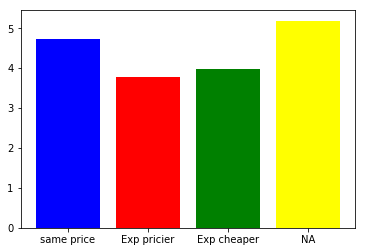

In [38]:
click_equal_3 = len(df.comp3_rate.loc[(df.comp3_rate == 0) & (df.click_bool == True)])
click_more_3 = len(df.comp3_rate.loc[(df.comp3_rate == -1) & (df.click_bool == True)])
click_less_3 = len(df.comp3_rate.loc[(df.comp3_rate == 1) & (df.click_bool == True)])
click_na_3 = len(df.comp3_rate.loc[(np.isnan(df.comp3_rate)) & (df.click_bool == True)])

npRes = np.log10(np.array([click_equal_3, click_more_3, click_less_3, click_na_3]))
keys = ['same price', 'Exp pricier', 'Exp cheaper', 'NA']

plt.bar(range(len(npRes)), npRes, align='center',color = ['blue','red','green', 'yellow'])
plt.xticks(range(len(npRes)), keys)
plt.show()

# Fill in missing data and create composite features

Fill in missing values with either first quartile of country or mean of country

In [51]:
df.prop_location_score2[np.isnan(df.prop_location_score2)] = -1
for c in df.prop_country_id.unique():
    #prop_location_score2 filled in with first quartile
    if len(df[(df.prop_country_id == c) & (df.prop_location_score2 != -1)]) != 0: 
        mean_country = np.mean(df.prop_location_score2.loc[(df.prop_country_id == c) & (df.prop_location_score2 != -1) ])
        min_country = min(df.prop_location_score2.loc[(df.prop_country_id == c) & (df.prop_location_score2 != -1)])
        first_quart = (min_country+mean_country)/2
        df.prop_location_score2.loc[(df.prop_country_id == c) & (df.prop_location_score2 == -1) ] = first_quart
    else:
        df.prop_location_score2.loc[(df.prop_country_id == c) & (df.prop_location_score2 == -1) ] = 0 
    #the rest are filled in with the mean  
    #difference in rating between client hist and prop rating
    df.star_diff.loc[(np.isnan(df.star_diff)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.star_diff.loc[df.prop_country_id == c])
    #difference in price between client hist and prop price
    df.usd_diff.loc[(np.isnan(df.usd_diff)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.usd_diff.loc[df.prop_country_id == c])
    #difference in distance between original dest and prop
    df.orig_destination_distance.loc[(np.isnan(df.orig_destination_distance)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.orig_destination_distance.loc[df.prop_country_id == c])
    #search query affinity
    df.srch_query_affinity_score.loc[(np.isnan(df.srch_query_affinity_score)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.srch_query_affinity_score.loc[df.prop_country_id == c])
    #review score
    df.prop_review_score.loc[(np.isnan(df.prop_review_score)) & (df.prop_country_id == c)] = \
                                                    np.mean(df.prop_review_score.loc[df.prop_country_id == c])
   
#difference between current price and historical price gets 0
df.diff_hist_price[np.isnan(df.diff_hist_price)] = 0       



Fill in missing competitor data with 0:

In [40]:
df.iloc[:,27:51] = df.iloc[:,27:51].fillna(value = 0, axis = 0)

Create new composite features:

In [41]:
#Difference in price between property historical price and current price
df['diff_hist_price'] = np.exp(df.prop_log_historical_price) - df.price_usd


In [42]:
#Total price/per night
df['total_price'] = df.price_usd * df.srch_room_count

In [43]:
#Price per person
df['price_per_pers'] = (df.price_usd * df.srch_room_count)/(df.srch_adults_count + df.srch_children_count)

Composite feature of the two property location scores:

In [57]:
df['prop_score'] = (df.prop_location_score2 + 0.00001)/(df.prop_location_score1 + 0.00001)

# Feature importance

In [59]:
dfTest = df
target = dfTest.click_bool 

In [60]:
dfTest = dfTest[['prop_score','prop_location_score1','prop_location_score2','diff_hist_price','price_per_pers','price_usd',
                'total_price','usd_diff', 'star_diff','promotion_flag', 'srch_query_affinity_score', 'orig_destination_distance',
                'prop_review_score', 'random_bool']]
             


In [61]:
from sklearn.ensemble import ExtraTreesClassifier

In [71]:
dfTest = dfTest.fillna(value='0')
model = ExtraTreesClassifier()
model.fit(dfTest, target)
dictImp  = zip(dfTest.head(0), model.feature_importances_)


In [72]:
from tabulate import tabulate

In [73]:
print tabulate(dictImp)

-------------------------  ----------
prop_score                 0.0785493
prop_location_score1       0.0564683
prop_location_score2       0.0781039
diff_hist_price            0.149991
price_per_pers             0.137807
price_usd                  0.129745
total_price                0.129614
usd_diff                   0.0248397
star_diff                  0.0240147
promotion_flag             0.00193369
srch_query_affinity_score  0.0351084
orig_destination_distance  0.134533
prop_review_score          0.0174132
random_bool                0.0018791
-------------------------  ----------
